In [1]:
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr, kendalltau

In [2]:
print(os.getcwd())
project_root = Path(os.getcwd()).parent.parent

c:\Users\James\CrediGraph\tgrag\algorithms


In [3]:
new_nodes_file = project_root / "data" / "dqr" / "new_nodes.csv"
new_edges_file = project_root / "data" / "dqr" / "new_edges.csv"
targets_file = project_root / "data" / "dqr" / "targets.csv"

print(f"Columns in {new_nodes_file}:")
print(pd.read_csv(new_nodes_file, nrows=0).columns.tolist())

print(f"\nColumns in {new_edges_file}:")
print(pd.read_csv(new_edges_file, nrows=0).columns.tolist())

print(f"\nColumns in {targets_file}:")
print(pd.read_csv(targets_file, nrows=0).columns.tolist())

Columns in c:\Users\James\CrediGraph\data\dqr\new_nodes.csv:
['node_id', 'domain', 'time_id', 'importance']

Columns in c:\Users\James\CrediGraph\data\dqr\new_edges.csv:
['src', 'dst', 'time_id']

Columns in c:\Users\James\CrediGraph\data\dqr\targets.csv:
['nid', 'cred_score']


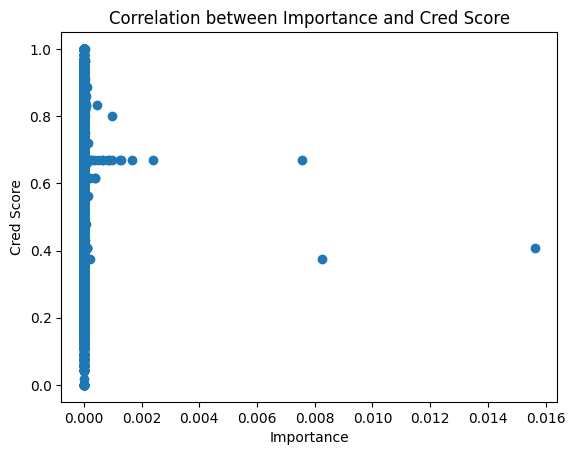

In [4]:
new_nodes_df = pd.read_csv(new_nodes_file)
targets_df = pd.read_csv(targets_file)

# Merge on node_id (new_nodes_df) and nid (targets_df)
merged_df = pd.merge(new_nodes_df, targets_df, left_on='node_id', right_on='nid', how='inner')

# Plot the correlation between 'importance' and 'cred_score'
plt.scatter(merged_df['importance'], merged_df['cred_score'])
plt.xlabel('Importance')
plt.ylabel('Cred Score')
plt.title('Correlation between Importance and Cred Score')
plt.show()

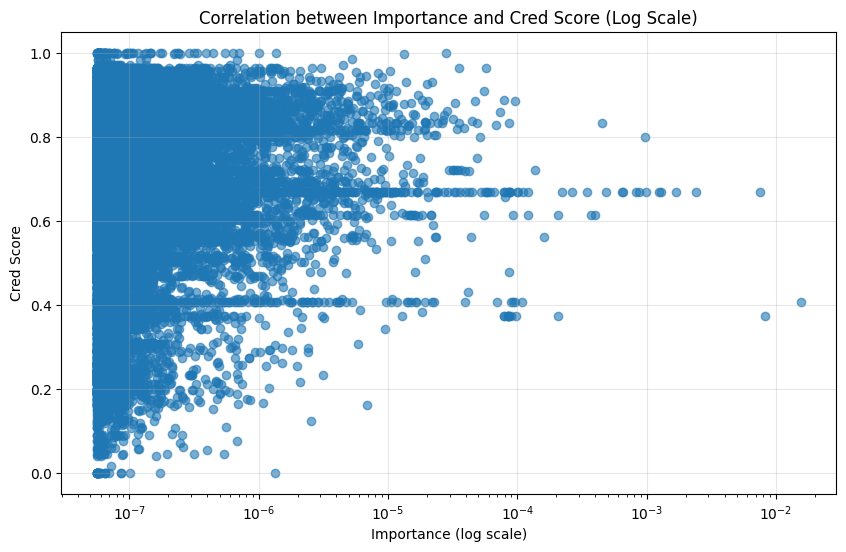

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['importance'], merged_df['cred_score'], alpha=0.6)
plt.xscale('log')
plt.xlabel('Importance (log scale)')
plt.ylabel('Cred Score')
plt.title('Correlation between Importance and Cred Score (Log Scale)')
plt.grid(True, alpha=0.3)
plt.savefig('correlation_plot.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()

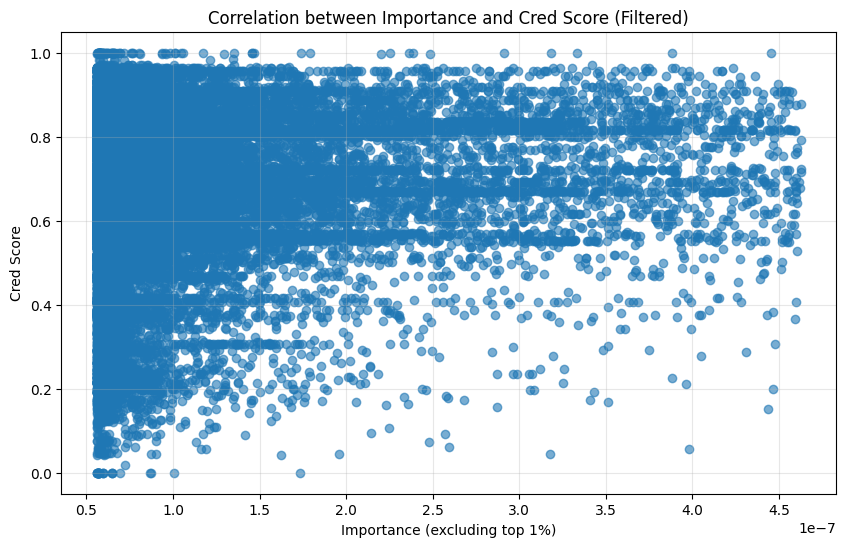

In [6]:
# Remove top 1% of importance scores to focus on the main distribution
q99 = merged_df['importance'].quantile(0.99)
filtered_df = merged_df[merged_df['importance'] <= q99]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['importance'], filtered_df['cred_score'], alpha=0.6)
plt.xlabel('Importance (excluding top 1%)')
plt.ylabel('Cred Score')
plt.title('Correlation between Importance and Cred Score (Filtered)')
plt.grid(True, alpha=0.3)
plt.savefig('correlation_plot_no_outliers.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()

In [7]:
from scipy.stats import spearmanr, pearsonr

# Calculate Pearson correlation
pearson_corr, pearson_p = pearsonr(merged_df['cred_score'], merged_df['importance'])
print(f"Pearson correlation between cred_score and importance: {pearson_corr:.4f} (p-value: {pearson_p:.4f})")

Pearson correlation between cred_score and importance: -0.0074 (p-value: 0.0001)


In [8]:
# Calculate correlations on filtered_df (excluding top 1% of importance scores)
pearson_corr_filt, pearson_p_filt = pearsonr(filtered_df['cred_score'], filtered_df['importance'])
print(f"Pearson correlation (filtered): {pearson_corr_filt:.4f} (p-value: {pearson_p_filt:.4f})")

Pearson correlation (filtered): 0.0895 (p-value: 0.0000)
